<a href="https://colab.research.google.com/github/pallaviraguri1183/Image-Classification/blob/main/Image_classification_between_two_different_entities_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize

In [2]:
DATADIR = '/content/drive/MyDrive'
CATAGORIES = ['parrot','horse']

In [3]:
y = []
x = []

In [4]:
for category in CATAGORIES:
  class_num = CATAGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resize = (resize(img_array,(150,150,3)))
    x.append(img_resize.flatten())
    y.append(class_num)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
x = np.array(x)
y = np.array(y)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)
grid_param = [{'C':[1,10,100,1000],'kernel':["linear"]},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001,0.00001],'kernel':["rbf"]},
              {'C':[1,10,100],'gamma':[0.001,0.001],'kernel':["poly"]}
              ]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,grid_param)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 1e-05], 'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'gamma': [0.001, 0.001],
                          'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
y_pred = clf.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
confusion_matrix(y_pred,y_test)

array([[5, 2],
       [1, 3]])

In [11]:
accuracy_score(y_pred,y_test)

0.7272727272727273

In [12]:
import pickle
pickle.dump(clf,open('Recognition_model.p','wb'))

In [13]:
model = pickle.load(open('Recognition_model.p','rb'))

Enter ur URLhttps://images.unsplash.com/photo-1553284965-83fd3e82fa5a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1000&q=80
(666, 1000, 3)
Predicted Output:horse


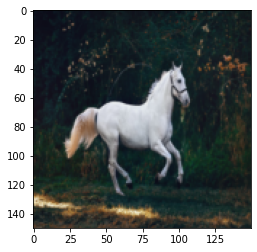

In [15]:
data = []
url = input('Enter ur URL')
img = imread(url)
img_resize = resize(img,(150,150,3))
data.append(img_resize.flatten())
data = np.array(data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(data)
y_out = CATAGORIES[y_out[0]]
print(f'Predicted Output:{y_out}')